# User Analysis

In here we are analysing the data in `data/users/`. Before pre-processing, **we have 341,018 users** that appear in our games network found in `data/games/network_raw`. 

In [1]:
import pandas as pd

user_prefs_filename = "../data/users/user_preferences_with_metadata.csv"
user_prefs_df = pd.read_csv(user_prefs_filename)
user_prefs_df.describe(include='all', datetime_is_numeric=True)

,user,signup_date,location,num_games,games
count,341018,341018,341018,341018.000000,341018
unique,341018,340454,258,NaN,89185
top,j5wzz2qj,Null,us,NaN,k6q4rqzd
freq,1,74,101936,NaN,5296
mean,NaN,NaN,NaN,1.980444,NaN
std,NaN,NaN,NaN,7.359630,NaN
min,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,2.000000,NaN


In [29]:
user_prefs_df = user_prefs_df[(user_prefs_df['signup_date'].notna()) & (user_prefs_df['signup_date'] != "Null")]
user_prefs_df['signup_date'] = pd.to_datetime(user_prefs_df['signup_date'], format='%Y-%m-%dT%H:%M:%SZ')
user_prefs_df['signup_date'] = pd.to_datetime(user_prefs_df['signup_date'].dt.strftime('%Y-%m-%d'))
user_prefs_df = user_prefs_df[(user_prefs_df['signup_date'] < '2023-01-01')]
user_prefs_df.describe(include='all', datetime_is_numeric=True)

,user,signup_date,location,num_games,games
count,335322,335322,335322,335322.000000,335322
unique,335322,NaN,257,NaN,88806
top,j5wzz2qj,NaN,us,NaN,k6q4rqzd
freq,1,NaN,101439,NaN,5131
mean,NaN,2020-06-28 13:40:53.271780608,NaN,1.994465,NaN
min,NaN,2014-01-06 00:00:00,NaN,1.000000,NaN
25%,NaN,2019-09-16 00:00:00,NaN,1.000000,NaN
50%,NaN,2021-01-04 00:00:00,NaN,1.000000,NaN
75%,NaN,2021-09-25 00:00:00,NaN,2.000000,NaN
max,NaN,2022-12-31 00:00:00,NaN,2059.000000,NaN


After processing our dataframe so that we remove users that have invalid signup dates, **we now have 320,944 users**. **During this process we removed 74 users**. In the collection, if a user could not found by the speedrun.com API, we set their signup date as "Null". This is explained by users deleting their account, but their runs still being avaialble on the leaderboards.

## Locations of Users of speedrun.com

In [30]:
grouped_df = user_prefs_df.groupby(['location'])
grouped_sum_df = grouped_df.sum(numeric_only=True)
grouped_sum_df['number'] = grouped_df.count().iloc[:, 0]
grouped_sum_df['avg_num_games'] = grouped_sum_df['num_games'] / grouped_sum_df['number']
grouped_sum_df.reset_index(inplace=True)
grouped_sum_df['location'] = grouped_sum_df['location'].str.upper()

In [31]:
country_df = pd.read_csv("../data/users/countries_codes_and_coordinates.csv")
country_df = country_df[['Country', 'Alpha-2 code']].rename(columns={'Alpha-2 code': 'location', 'Country': 'country'})
country_df['location'] = country_df['location'].str.strip()
country_df['location'] = country_df['location'].str.replace('\"', '', -1)

In [32]:
merged_df = country_df.merge(grouped_sum_df, on='location', how='right')
merged_df.sort_values(by='number').tail(15).iloc[::-1]

,country,location,num_games,number,avg_num_games
246,United States,US,231617,101439,2.283313
0,NaN,NONE,75708,58107,1.302907
40,Canada,CA,35312,14930,2.365171
87,NaN,GB/ENG,25236,12880,1.959317
84,France,FR,25789,12425,2.075573
61,Germany,DE,24277,11794,2.058420
13,Australia,AU,18675,9765,1.912442
33,Brazil,BR,18609,8987,2.070658
204,Russian Federation,RU,15221,7534,2.020308
205,Russia,RU,15221,7534,2.020308


/var/folders/fp/pwtrzcy130zdfcx62mp9_kmc0000gn/T/ipykernel_1669/4057603385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['country'].iloc[3] = "England"


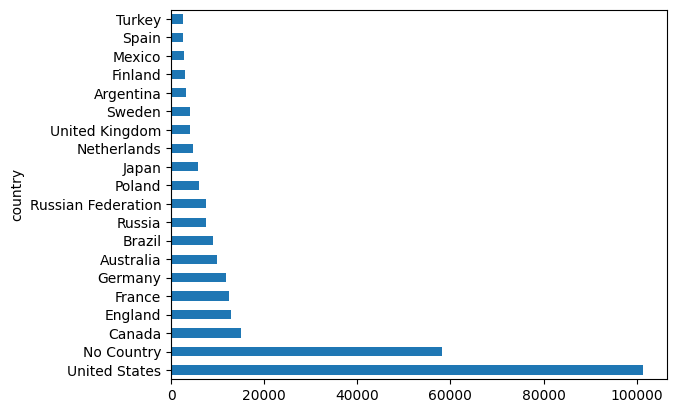

In [33]:
import matplotlib.pyplot as plt

num_countries = 20
plot_df = merged_df.sort_values(by='number', ascending=False).head(num_countries)
plot_df['country'].iloc[1] = "No Country"
plot_df['country'].iloc[3] = "England"

ax0 = plot_df.plot.barh(x='country', y='number')
ax0.get_legend().remove()

plt.show()

We can see from the graph **nearly a third of all speedrunners say that they live in the United States**. The next biggest demographic is users that did not set a location on their profile. For the remaining countries in the top 20 demographics, we must question why those countries in particular? Do these countries have similarities? What do these countries have that mean they have many speedrunners?

## Signup Date of Users of speedrun.com

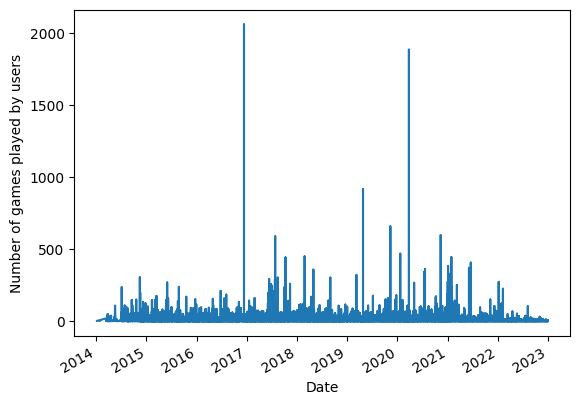

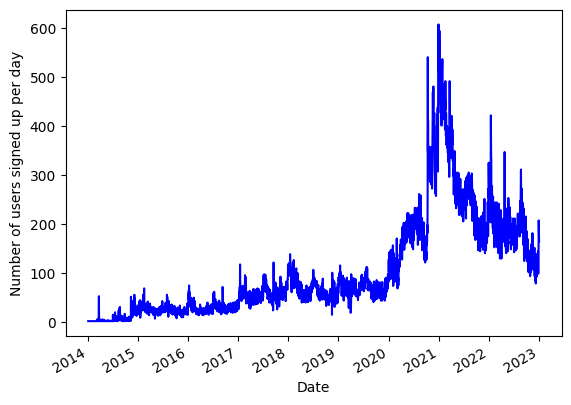

In [39]:
import matplotlib.pyplot as plt

ax1 = user_prefs_df.sort_values(by='signup_date').plot.line(x='signup_date', y='num_games')
ax1.get_legend().remove()
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of games played by users")

user_signup_df = user_prefs_df.groupby(['signup_date']).count()
user_signup_df.reset_index(inplace=True)
ax2 =  user_signup_df.plot.line(x='signup_date', y='user', color='blue')
ax2.get_legend().remove()
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of users signed up per day")

plt.show()

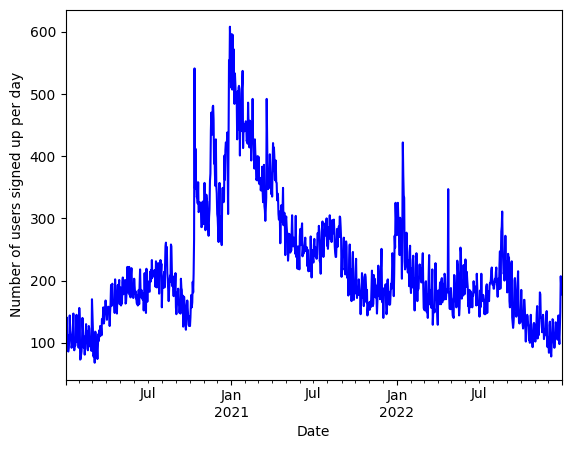

In [40]:
user_signup_2020_2022_df = user_signup_df[(user_signup_df['signup_date'] > '2020-01-01') & (user_signup_df['signup_date'] < '2022-12-31')]
ax = user_signup_2020_2022_df.sort_values(by='signup_date').plot.line(x='signup_date', y='user', color='blue')
ax.get_legend().remove()
ax.set_xlabel("Date")
ax.set_ylabel("Number of users signed up per day")
plt.show()